In [4]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import FileLink

In [ ]:
rootSourcePath = "Data/Aumentados_iguales"

In [110]:
# Lista para almacenar los resultados
resultados = []

# Iterar sobre los archivos de la carpeta
for file in os.listdir(rootSourcePath):
    img_path = os.path.join(rootSourcePath, file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    # Binarizar la imagen
    _, img_bin = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    # Calcular los momentos de Hu
    moments = cv2.moments(img_bin)
    hu = cv2.HuMoments(moments).flatten()
    resultados.append([file] + hu.tolist())

# Crear un DataFrame de pandas
col = ['filename'] + [f'hu_{i+1}' for i in range(7)]
df_hu = pd.DataFrame(resultados, columns = col)

# Mostrar el DataFrame
print(df_hu)

              filename      hu_1          hu_2          hu_3          hu_4  \
0     A1Z01F01_000.png  0.000766  1.539228e-07  1.513661e-11  2.286654e-12   
1     A1Z01F02_000.png  0.000630  2.784545e-09  1.396443e-12  2.220245e-15   
2     A1Z01F03_000.png  0.000656  2.969566e-08  8.399905e-12  1.966831e-13   
3     A1Z01F04_000.png  0.000638  5.038583e-09  1.111702e-11  6.094912e-14   
4     A1Z01F05_000.png  0.000642  1.233371e-08  1.619967e-12  3.461091e-14   
...                ...       ...           ...           ...           ...   
1730  A6Z30F02_105.png  0.002222  2.247576e-06  2.800692e-09  2.802998e-10   
1731  A6Z30F03_105.png  0.001875  6.549138e-07  2.821003e-09  6.140383e-10   
1732  A6Z30F04_105.png  0.001640  1.039878e-06  1.033061e-09  6.633849e-11   
1733  A6Z30F05_105.png  0.001958  1.323977e-06  5.708805e-10  2.527161e-10   
1734  A6Z30F06_105.png  0.005185  1.823237e-05  9.717163e-09  2.990563e-09   

              hu_5          hu_6          hu_7  
0     1.228197

In [ ]:
df_hu.to_csv('hu_moments.csv', index=False)
FileLink('hu_moments.csv')

c:\Users\ironj\RockArt-unsupervised\hu_moments.csv

In [100]:
# Cargar imagen en escala de grises y binarizarla

#C:\Users\ironj\RockArt-unsupervised\A1Z01F01_000.png
#C:/Users/ironj/RockArt-unsupervised/A1Z01F01_000.png

img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
print(img.shape)
_, binary = cv2.threshold(img, 124, 250, cv2.THRESH_BINARY)

# Calcular momentos y momentos de Hu
moments = cv2.moments(binary)
hu = cv2.HuMoments(moments).flatten()

print("Moments de Hu:", hu)

(174, 174)
Moments de Hu: [ 7.81266823e-04  1.60141308e-07  1.60630944e-11  2.42661541e-12
  1.38314935e-23  9.62366507e-16 -6.18189963e-24]


(174, 174)


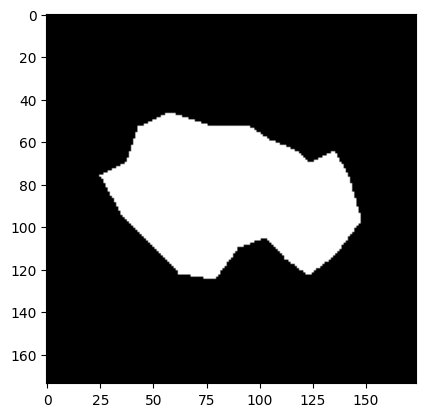

In [101]:
print(binary.shape)
plt.imshow(binary, cmap = "gray")
plt.show()

In [27]:
img_rotada = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

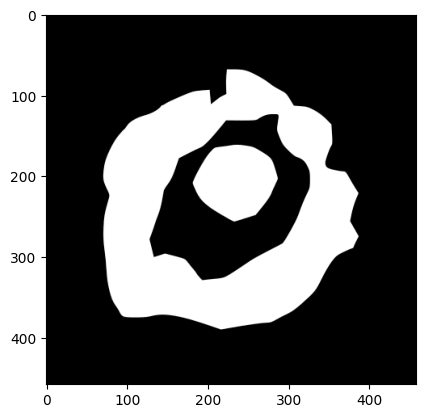

In [75]:
plt.imshow(img, cmap = "gray")

In [49]:
min_value = None
min_image_name = None

for filename in os.listdir(rootSourcePath):
    img_full_path = os.path.join(rootSourcePath, filename)
    img_temp = cv2.imread(img_full_path, cv2.IMREAD_GRAYSCALE)
    if img_temp is not None:
        nonzero_pixels = img_temp[img_temp > 1]
        if nonzero_pixels.size > 1:
            current_min = nonzero_pixels.min()
            if (min_value is None) or (current_min < min_value):
                min_value = current_min
                min_image_name = filename

print(f"El menor valor diferente a cero es {min_value} en la imagen {min_image_name}")

El menor valor diferente a cero es 2 en la imagen A1Z10F15_009.png


In [36]:
print(img.shape)

(740, 740)


In [106]:
rows, cols = binary.shape
num_pixels = 0
for row in range(rows):
    for col in range(cols):
        value = binary[row, col]
        if value > 100 and value < 249:
            print(f"Valor: {value} en posición ({row}, {col})")
            num_pixels += 1
print(f"Número total de píxeles con valor entre 0 y 10: {num_pixels}")

Número total de píxeles con valor entre 0 y 10: 0


In [44]:
print(img[150][250])

30
